In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Student_Performance.csv")

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.shape

(10000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(127)

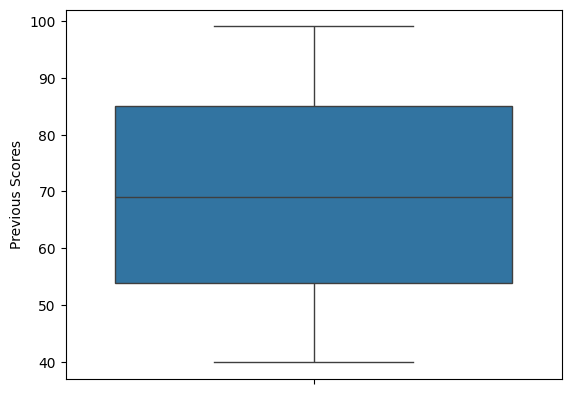

In [10]:
sns.boxplot(data["Previous Scores"])
plt.show()

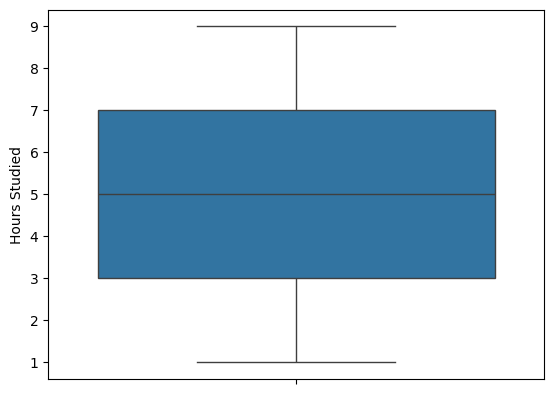

In [11]:
sns.boxplot(data["Hours Studied"])
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Extracurricular Activities"] = le.fit_transform(data["Extracurricular Activities"])

In [14]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [20]:
y = data["Performance Index"]
x = data.drop(columns = ["Performance Index"])

In [21]:
# here we are splitting the data into train and test models
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [27]:
# predictions of a model
y_pred_test = lr.predict(xtest)
y_pred_train = lr.predict(xtrain)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("\nModel Performance:")
print("R² (Train):", r2_score(ytrain, y_pred_train))
print("R² (Test):", r2_score(ytest, y_pred_test))
print("RMSE (Test):", mean_squared_error(ytest, y_pred_test))
print("MAE (Test):", mean_absolute_error(ytest, y_pred_test))


Model Performance:
R² (Train): 0.9886898790682355
R² (Test): 0.9889832909573145
RMSE (Test): 4.082628398521857
MAE (Test): 1.6111213463123049


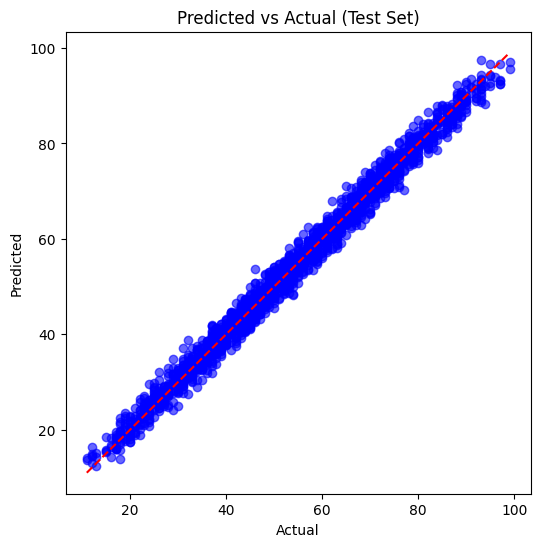

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(ytest, y_pred_test, alpha=0.6, color="blue")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test Set)")
plt.show()

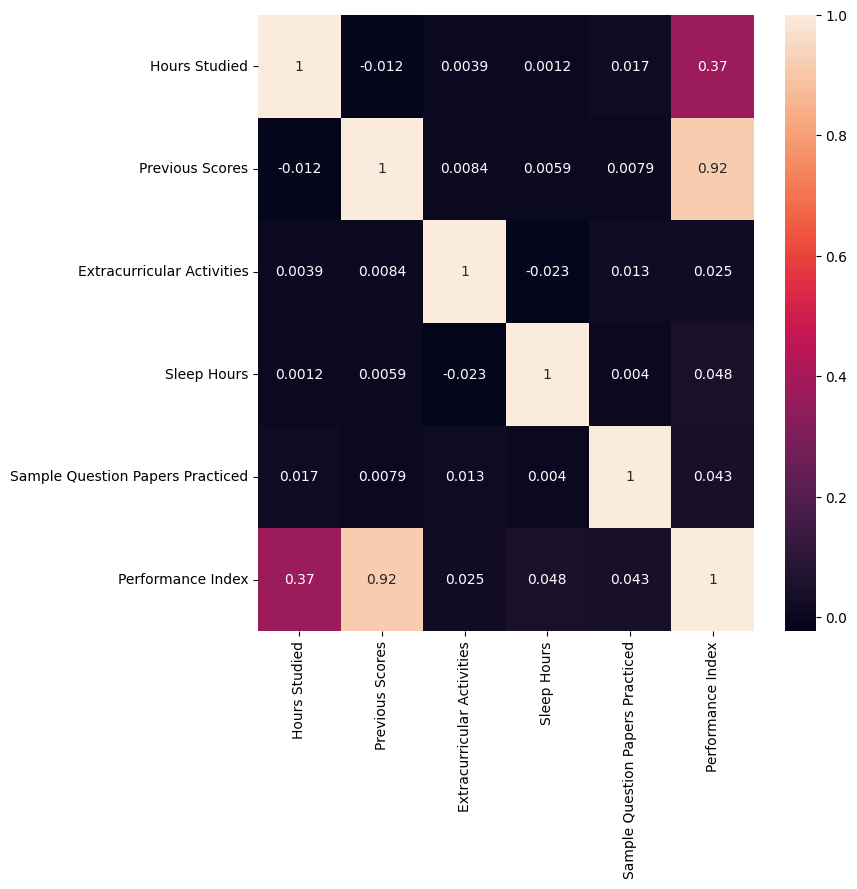

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

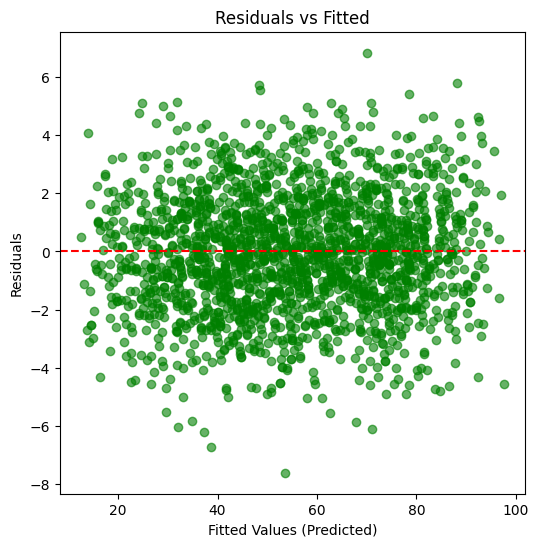

In [33]:
residuals = ytest - y_pred_test
plt.figure(figsize=(6,6))
plt.scatter(y_pred_test, residuals, alpha=0.6, color="green")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

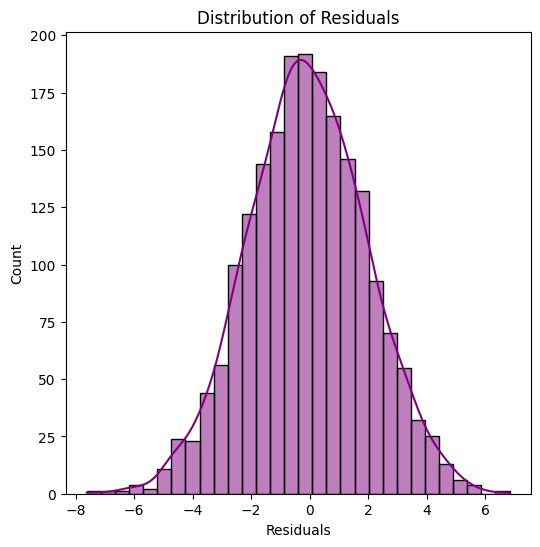

In [34]:
plt.figure(figsize=(6,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Feature Importance (MLR Coefficients)")
plt.show()

NameError: name 'coef_df' is not defined

<Figure size 800x600 with 0 Axes>